/var/folders/cv/0rgfl8cs40g0lnwkzp8sskhh0000gn/T/ipykernel_61325/51689735.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Predicted_change_income'] = model.predict(X)
/var/folders/cv/0rgfl8cs40g0lnwkzp8sskhh0000gn/T/ipykernel_61325/51689735.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Predicted_change_income'] = model.predict(X)
/var/folders/cv/0rgfl8cs40g0lnwkzp8sskhh0000gn/T/ipykernel_61325/51689735.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy 

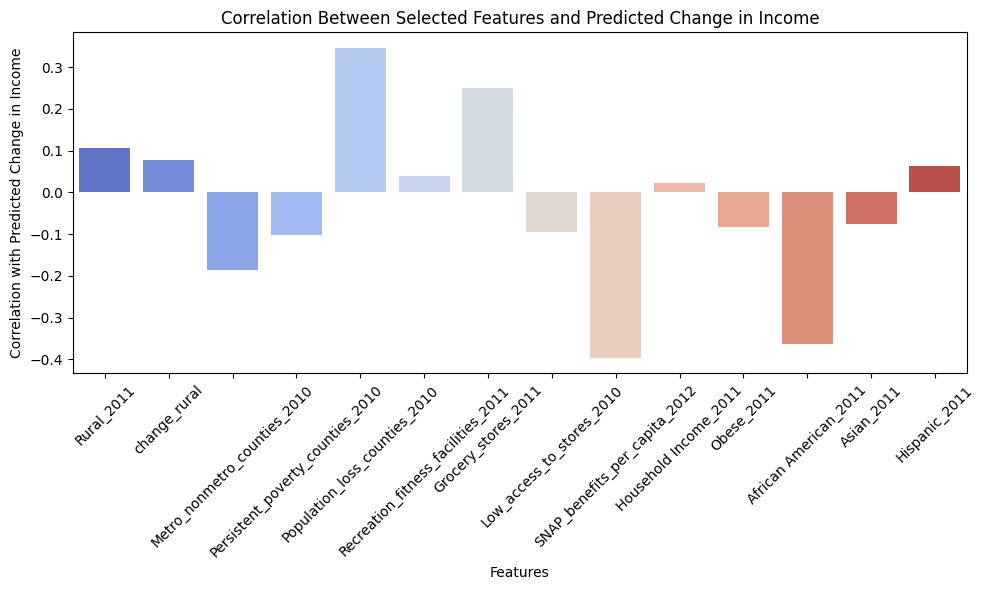

In [4]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('merged_regression_data.csv')

# Define the predictors and features to correlate
predictors = ['Percent_change_fast_food_restaurants_2011_2016', 'Percent_change_convenience_stores_2011_2016']
features_to_correlate = [
    'Rural_2011', 
    'change_rural',
    'Metro_nonmetro_counties_2010', 
    'Persistent_poverty_counties_2010',
    'Population_loss_counties_2010', 
    'Recreation_fitness_facilities_2011',
    'Grocery_stores_2011', 
    'SNAP_benefits_per_capita_2012',
    'Household Income_2011', 
    'Obese_2011', 
    'African American_2011', 
    'Asian_2011', 
    'Hispanic_2011'
]

# Combine the predictors and features_to_correlate into a single list
columns_to_use = predictors + features_to_correlate + ['change_income']

# Drop rows with missing data in these columns
data = data.dropna(subset=columns_to_use)

# List of states
states = data['State_2011'].unique()

# Prepare an empty DataFrame to store predictions
all_predictions = pd.DataFrame()

# Loop over each state to fit the model and make predictions
for state in states:
    state_data = data[data['State_2011'] == state]
    
    # Define predictors and response variable
    X = state_data[predictors]
    y = state_data['change_income']
    
    # Add a constant (intercept term)
    X = sm.add_constant(X)
    
    # Fit the model
    model = sm.OLS(y, X).fit()
    
    # Make predictions and add them to the state data
    state_data['Predicted_change_income'] = model.predict(X)
    
    # Append to the all_predictions DataFrame
    all_predictions = pd.concat([all_predictions, state_data], ignore_index=True)

# Calculate the correlation matrix
correlation_matrix = all_predictions[features_to_correlate + ['Predicted_change_income']].corr()

# Extract correlations of the selected features with predicted change in income
correlations = correlation_matrix['Predicted_change_income'].drop('Predicted_change_income')

# Plot the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.index, y=correlations.values, palette='coolwarm')
plt.title('Correlation Between Selected Features and Predicted Change in Income')
plt.xlabel('Features')
plt.ylabel('Correlation with Predicted Change in Income')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("correlation_plot_with_county_features_income.png")
plt.show()
